# Modelos D.L.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((10, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import pandas as pd
SOH=pd.read_csv('SOH_TR.csv')


In [ ]:
def df_to_X_y(df, window_size=10):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

def df_to_X_y2(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []

  for i in range(0,len(df_as_np)-window_size[0]-window_size[1],1000):
    row = df_as_np[i:i+window_size[0]]
    X.append(row)
    label = df_as_np[i+window_size[0]:i+window_size[0]+window_size[1]]
    y.append(label)

  return np.array(X), np.array(y)


In [ ]:
import pandas as pd
import numpy as np
import json
#WINDOW_SIZE = np.array([100000,10000])
WINDOW_SIZE=10
X1, y1 = df_to_X_y(SOH, WINDOW_SIZE)
X1.shape, y1.shape

((134, 10, 1, 1), (134, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


In [ ]:

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.01), metrics=[RootMeanSquaredError()])

In [ ]:

model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500)

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - loss: 0.2307 - root_mean_squared_error: 0.4799 - val_loss: 0.2284 - val_root_mean_squared_error: 0.4780
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.2529 - root_mean_squared_error: 0.5027 - val_loss: 0.1828 - val_root_mean_squared_error: 0.4275
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.2561 - root_mean_squared_error: 0.5057 - val_loss: 0.2048 - val_root_mean_squared_error: 0.4525
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.2259 - root_mean_squared_error: 0.4750 - val_loss: 0.1828 - val_root_mean_squared_error: 0.4275
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - loss: 0.2828 - root_mean_squared_error: 0.5229 - val_loss: 0.2726 - val_root_mean_squared_error: 0.5221
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.3142 - root_mean_squared_error: 0.5594 - val_loss: 0.1865 - val_root_mean_squared_error: 0.4318
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - loss: 0.

In [ ]:
model1.save("M1_ETR.keras")

In [ ]:
import tensorflow as tf
model1 = tf.keras.models.load_model("M1_ETR.keras")

In [ ]:
model1.predict(X_test[0].reshape(1,10,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[98.959465]], dtype=float32)

In [ ]:
print(X_train[0].shape)
print(X1[0:1000].shape)
train_predictions = model1.predict(X1[-1].reshape(1,10,1))
train_predictions


(10, 1, 1)
(134, 10, 1, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


array([[95.03019]], dtype=float32)

In [ ]:
time=100

SOH_Final=X1[0]

for i in range(time):

    test_predictions = model1.predict(SOH_Final[-10:].reshape(1,10,1))
    SOH_Final= np.append(SOH_Final,  test_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━

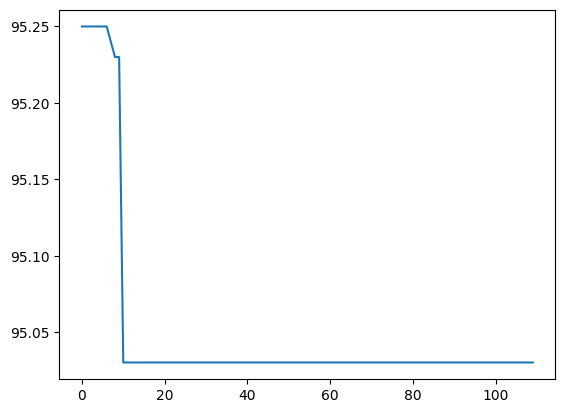

In [ ]:
import matplotlib.pyplot as plt

plt.plot(SOH_Final)


# MODELS 2

In [ ]:
import pandas as pd

import tensorflow as tf
SOH=pd.read_csv('SOH.csv')
model_2 = tf.keras.models.load_model("M1_server.keras")



ValueError: File not found: filepath=M1_server.keras. Please ensure the file is an accessible `.keras` zip file.

In [ ]:
def df_to_X_y(df, window_size=10):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

def df_to_X_y2(df, window_size):
  df_as_np = df.to_numpy()
  X = []
  y = []

  for i in range(0,len(df_as_np)-window_size[0]-window_size[1],20000):
    row = df_as_np[i:i+window_size[0]]
    X.append(row)
    label = df_as_np[i+window_size[0]:i+window_size[0]+window_size[1]]
    y.append(label)

  return np.array(X), np.array(y)

In [ ]:
import pandas as pd
import numpy as np
import json
# Define WINDOW_SIZE as a list or a NumPy array with two elements
WINDOW_SIZE = [20000, 10000]
#WINDOW_SIZE = np.array([10000, 20000]) # Alternative using NumPy

# Call df_to_X_y2 with the array WINDOW_SIZE
X1, y1 = df_to_X_y2(SOH, WINDOW_SIZE)
X1.shape, y1.shape


((17, 20000, 1), (17, 10000, 1))

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Load the model
model_2 = tf.keras.models.load_model("M1_server.keras")

# Load the data
SOH = pd.read_csv('SOH.csv')

# Get the first column of the DataFrame (assuming it has a header)
# If the DataFrame doesn't have a header, then use SOH.iloc[:, 0]
SOH_Final = SOH.iloc[:, 0].values

time = 100

for i in range(time):
    # Reshape the input to match the model's expected shape (1, 20000, 1)
    test_predictions = model_2.predict(SOH_Final[-20000:].reshape(1, 20000, 1))
    # Append the prediction to SOH_Final
    SOH_Final = np.append(SOH_Final, test_predictions)

1/1 [==============================] - 1s 694ms/step


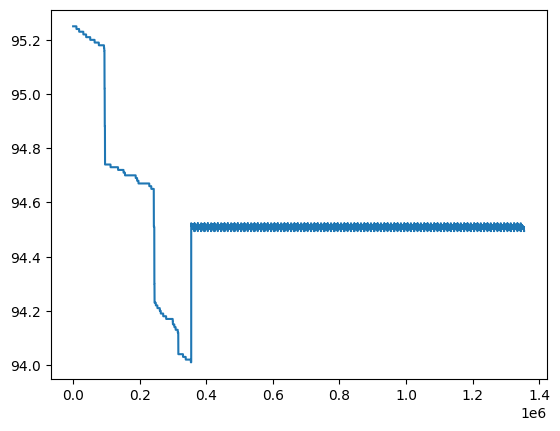

In [ ]:
import matplotlib.pyplot as plt

plt.plot(SOH_Final)

#Comparation

In [ ]:
!pip install g[full]

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.6 MB/s eta 0:00:00
   ━━━

In [ ]:
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
import pandas as pd
SOH=pd.read_csv('SOH_TR.csv')

In [ ]:
data=SOH

<Axes: >

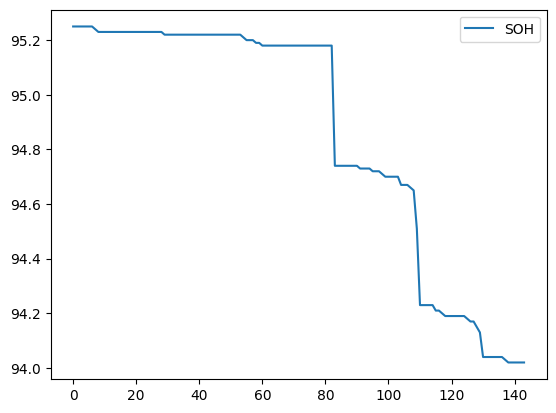

In [ ]:
# plot the dataset
data.plot()

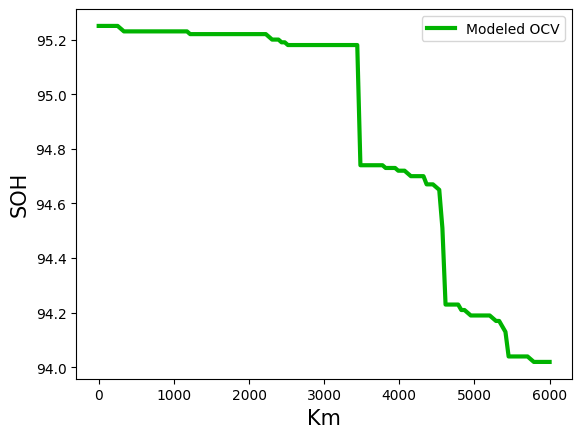

In [ ]:
import numpy as np

# Crear un vector de 0 a 6000 con 144 elementos
ODO = np.linspace(0, 6000, 144)

# Crear la figura y configurar el gráfico
import matplotlib.pyplot as plt



# Graficar SOC vs V
#plt.plot(SOC, V, linewidth=3, color=[0, 0, 1], label='Measured Voltage')

# Graficar SOC vs OCV
plt.plot(ODO,SOH , linewidth=3, color=[0, 0.7, 0], label='Modeled OCV')

# Configuración de los ejes


# Leyenda
plt.legend(loc='best')

# Etiquetas de los ejes
plt.xlabel('Km', fontsize=15)
plt.ylabel('SOH', fontsize=15)

# Mostrar la gráfica
plt.show()

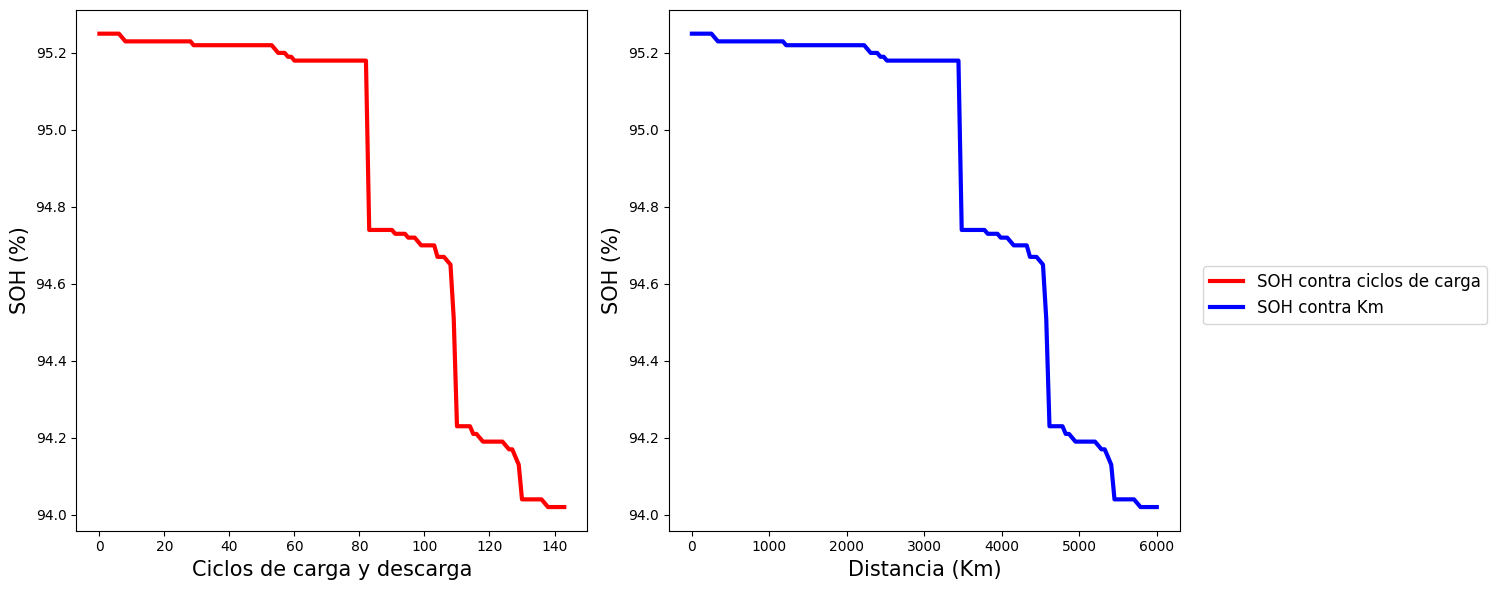

In [ ]:
import matplotlib.pyplot as plt

# Suponiendo que ya tienes los datos de la primera función I_F y la segunda función I_G
# Ejemplo de datos (puedes reemplazarlos por tus propios datos)
import numpy as np
 # Tiempo


# Crear la figura y los subgráficos (2 columnas)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Graficar la primera función en el primer subgráfico
ax[0].plot( data, linewidth=3, color="Red", label="SOH contra ciclos de carga")
ax[0].set_xlabel('Ciclos de carga y descarga', fontsize=15)
ax[0].set_ylabel('SOH (%)', fontsize=15)

# Graficar la segunda función en el segundo subgráfico
ax[1].plot( ODO,SOH, linewidth=3, color="Blue", label="SOH contra Km")
ax[1].set_xlabel('Distancia (Km)', fontsize=15)
ax[1].set_ylabel('SOH (%)', fontsize=15)

# Añadir leyenda fuera de la gráfica (fuera del área de la figura)
fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=12)

# Ajustar el espacio entre los subgráficos y la leyenda
plt.tight_layout()

# Mostrar la gráfica
plt.show()

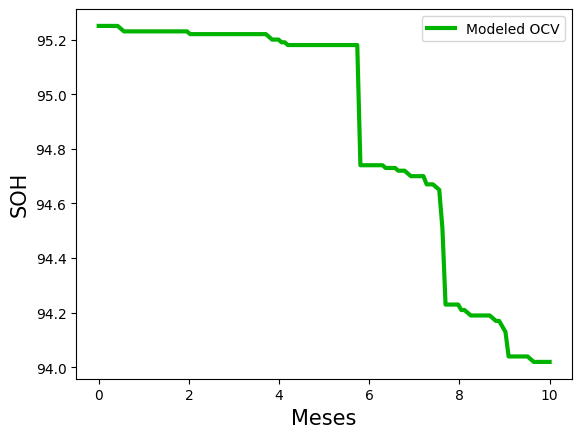

In [ ]:
import numpy as np

# Crear un vector de 0 a 10 meses con 144 elementos
vector_meses = np.linspace(0, 10, 144)

import matplotlib.pyplot as plt



# Graficar SOC vs V
#plt.plot(SOC, V, linewidth=3, color=[0, 0, 1], label='Measured Voltage')

# Graficar SOC vs OCV
plt.plot(vector_meses,SOH , linewidth=3, color=[0, 0.7, 0], label='Modeled OCV')

# Configuración de los ejes


# Leyenda
plt.legend(loc='best')

# Etiquetas de los ejes
plt.xlabel('Meses', fontsize=15)
plt.ylabel('SOH', fontsize=15)

# Mostrar la gráfica
plt.show()


In [ ]:
# import pycaret time series and init setup
from pycaret.time_series import *
s = setup(data, fh = 20, session_id = 123)

,Description,Value
0,session_id,123
1,Target,SOH
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(124, 1)"
7,Transformed test set shape,"(20, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
# import TSForecastingExperiment and init the class
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()


In [ ]:
# check the type of exp
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [ ]:
exp.setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,SOH
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(141, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
# check statistical tests on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,144.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,94.86125
3,Summary,Statistics,Transformed,Median,,95.18
4,Summary,Statistics,Transformed,Standard Deviation,,0.454668
5,Summary,Statistics,Transformed,Variance,,0.206723
6,Summary,Statistics,Transformed,Kurtosis,,-1.020366
7,Summary,Statistics,Transformed,Skewness,,-0.78905
8,Summary,Statistics,Transformed,# Distinct Values,,28.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",2107.765667


In [ ]:
# compare baseline models
#best = compare_models(n_selects=3)   eLEGIR 3 MODELOS
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
auto_arima,Auto ARIMA,0.7850,1.5862,0.0316,0.0568,0.0003,0.0003,0.3630,10.1267
naive,Naive Forecaster,1.3888,2.1784,0.1338,0.1786,0.0014,0.0014,-1.4708,2.6167
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,3.1539,3.0220,0.1783,0.2209,0.0019,0.0019,-49.6083,1.0267
theta,Theta Forecaster,3.8080,3.2650,0.1951,0.2318,0.0021,0.0021,-99.9274,0.0500
exp_smooth,Exponential Smoothing,4.3435,3.5180,0.2091,0.2451,0.0022,0.0022,-143.4964,0.1233
ets,ETS,4.4019,3.5319,0.1939,0.2281,0.0021,0.0020,-165.5124,1.0333
arima,ARIMA,4.7606,3.6472,0.1838,0.2115,0.0019,0.0019,-215.6488,0.3700
stlf,STLF,5.1313,3.7858,0.2090,0.2353,0.0022,0.0022,-210.2585,0.1033
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,5.6259,4.2090,0.2858,0.3269,0.0030,0.0030,-231.8720,1.4333
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,5.7483,4.2673,0.3025,0.3397,0.0032,0.0032,-233.7275,1.5133


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [ ]:
# plot forecast
plot_model(best, plot = 'forecast')

In [ ]:
# plot forecast for 36 months in future
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 2000})

In [ ]:
# compare baseline models
best2= compare_models(n_select=3)   #eLEGIR 3 MODELOS


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
auto_arima,Auto ARIMA,0.7850,1.5862,0.0316,0.0568,0.0003,0.0003,0.3630,9.8067
naive,Naive Forecaster,1.3888,2.1784,0.1338,0.1786,0.0014,0.0014,-1.4708,0.0600
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,3.1539,3.0220,0.1783,0.2209,0.0019,0.0019,-49.6083,1.0133
theta,Theta Forecaster,3.8080,3.2650,0.1951,0.2318,0.0021,0.0021,-99.9274,0.0567
exp_smooth,Exponential Smoothing,4.3435,3.5180,0.2091,0.2451,0.0022,0.0022,-143.4964,0.9767
ets,ETS,4.4019,3.5319,0.1939,0.2281,0.0021,0.0020,-165.5124,0.6633
arima,ARIMA,4.7606,3.6472,0.1838,0.2115,0.0019,0.0019,-215.6488,0.3567
stlf,STLF,5.1313,3.7858,0.2090,0.2353,0.0022,0.0022,-210.2585,0.0900
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,5.6259,4.2090,0.2858,0.3269,0.0030,0.0030,-231.8720,1.4100
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,5.7483,4.2673,0.3025,0.3397,0.0032,0.0032,-233.7275,1.4700


Processing:   0%|          | 0/119 [00:00<?, ?it/s]

In [ ]:
# plot forecast
plot_model(best2, plot = 'forecast')

In [ ]:
plot_model(best2, plot = 'forecast', data_kwargs = {'fh' : 2000})

# Regresión

SVR

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-package

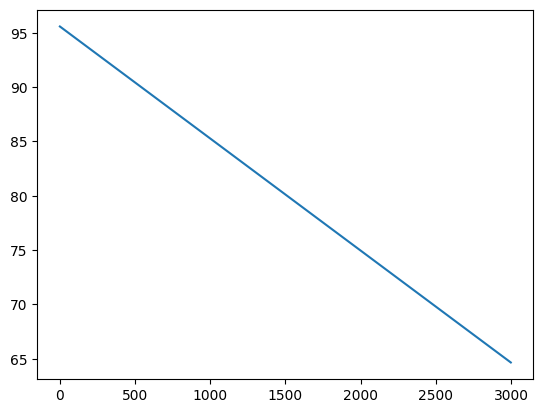

The train score for ls model is 0.8217605437051724
The test score for ls model is 0.7398547883242581
The test score for ls model is 0.7398547883242581


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('SOH_TR.csv')

# Convert X to a DataFrame with a single column
X = pd.DataFrame({'feature_name': list(range(0, len(df), 1))})  # Replace 'feature_name' with a relevant name
y = df['SOH']

# ... (Rest of your code)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y ,test_size=0.2, random_state=42)

svr = SVR(kernel='linear')  # Puedes cambiar el kernel a 'linear', 'poly', etc.
svr.fit(X_train1, y_train1)

n=3000
SOH_FUT_SVR=[]

for i in range(n):
  next_pred= svr.predict([[i]])

  SOH_FUT_SVR.append(next_pred)



# Extract the predicted SOH values directly (they are the first elements of each array)
soh_fut_values = [pred[0] for pred in SOH_FUT_SVR]

# Now plot the extracted values
plt.plot(soh_fut_values)
#plt.plot(df['SOH'])
plt.show()

train_score_ls = svr.score(X_train1, y_train1)
test_score_ls = svr.score(X_test1, y_test1)
train_score_ls = svr.score(X_train1, y_train1)
test_score_ls = svr.score(X_test1, y_test1)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))

print("The test score for ls model is {}".format(test_score_ls))




LASSO

Se truncaron las últimas líneas 5000 del resultado de transmisión.
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/di

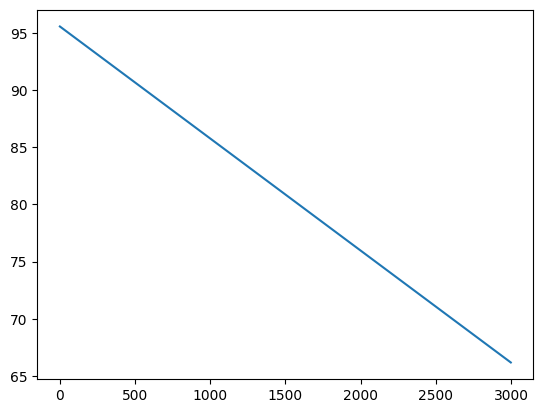

The train score for ls model is 0.8261413993579045
The test score for ls model is 0.7474635121595705


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

df = pd.read_csv('SOH_TR.csv')

# Convert X to a DataFrame with a single column
X = pd.DataFrame({'feature_name': list(range(0, len(df), 1))})  # Replace 'feature_name' with a relevant name
y = df['SOH']

# ... (Rest of your code)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y ,test_size=0.2, random_state=42)

lasso = Lasso(alpha=0.1)  # Puedes ajustar el parámetro alpha según sea necesario
lasso.fit(X_train2, y_train2)


n=3000
SOH_FUT=[]

for i in range(n):
  next_pred= lasso.predict([[i]])

  SOH_FUT.append(next_pred)



# Extract the predicted SOH values directly (they are the first elements of each array)
soh_fut_values = [pred[0] for pred in SOH_FUT]

# Now plot the extracted values
plt.plot(soh_fut_values)
#plt.plot(df['SOH'])
plt.show()
train_score_ls =lasso.score(X_train2,y_train2)
test_score_ls =lasso.score(X_test2,y_test2)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))



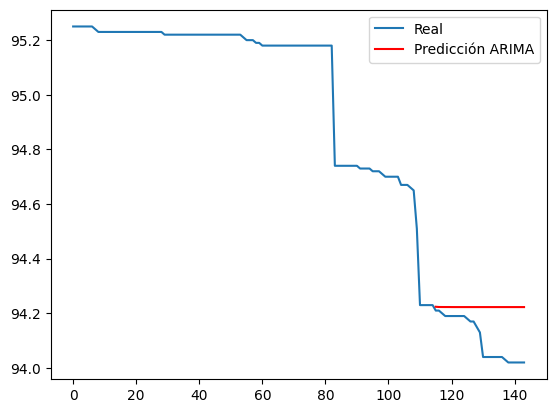

Mean Squared Error (MSE): 0.018880389093443778
R2 Score: -2.1057401767372106
Model Precision (1 - Mean Relative Error): 0.9987964113154698


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el conjunto de datos
df = pd.read_csv('SOH_TR.csv')

# Suponemos que df['SOH'] es nuestra serie temporal
y = df['SOH']

# Dividir el conjunto de datos en entrenamiento y prueba
train_size = int(len(y) * 0.8)
train, test = y[:train_size], y[train_size:]

# Ajustar el modelo ARIMA (p, d, q) - puedes cambiar estos parámetros dependiendo de los datos
# Aquí usamos (5, 1, 0) como ejemplo, pero puedes ajustar estos valores según la serie temporal.
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Realizar las predicciones sobre el conjunto de prueba
forecast = model_fit.forecast(steps=len(test))

# Graficar los resultados
plt.plot(y, label='Real')
plt.plot(range(train_size, len(y)), forecast, color='red', label='Predicción ARIMA')
plt.legend()
plt.show()

# Evaluación del modelo
mse = mean_squared_error(test, forecast)
r2 = r2_score(test, forecast)

# Calcular la precisión del modelo (usando el R2 Score)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)

# Si prefieres la precisión en términos de error relativo o otra métrica:
absolute_error = np.abs(test - forecast)
relative_error = absolute_error / np.abs(test)

# Promedio del error relativo (precisión)
precision = 1 - np.mean(relative_error)
print("Model Precision (1 - Mean Relative Error):", precision)

Regresión

Pendiente: -0.0098506140858927
Punto de corte con el eje Y: 95.56361924242735


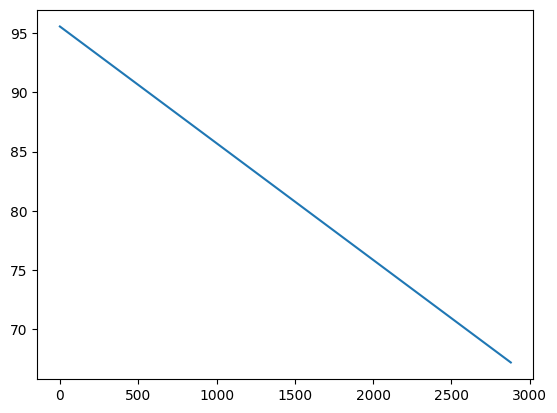

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('SOH_TR.csv')

X = pd.Series(list(range(0, len(df), 1)))
y = df['SOH']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_
model.intercept_

y_pred = model.predict(X.values.reshape(-1, 1))
x1 = X.values.reshape(-1, 1)[0][0]  # Use .values to get the underlying NumPy array before reshaping
y1 = y_pred[0]  # Valor predicho correspondiente al primer punto en X
x2 = X.values.reshape(-1, 1)[-1][0] # Use .values to get the underlying NumPy array before reshaping
y2 = y_pred[-1]  # Valor predicho correspondiente al último punto en X

# Calcular la pendiente
pendiente = (y2 - y1) / (x2 - x1)

# Calcular el punto de corte con el eje Y (b) usando la ecuación de la recta: y = mx + b
punto_corte = y1 - pendiente * x1

print(f"Pendiente: {pendiente}")
print(f"Punto de corte con el eje Y: {punto_corte}")

def funcion_prediccion_salva_tesis(x):
  return pendiente * x + punto_corte #+ np.random.normal(0, 1)/10000

#X = pd.Series(list(range(0, len(df), 1)))
año = int(len(y_pred)*12/9)
total_años = 15
X_L = pd.Series(list(range(0, total_años*año, 1)))
y_L = [funcion_prediccion_salva_tesis(i) for i in X_L]
plt.plot(X_L, y_L)


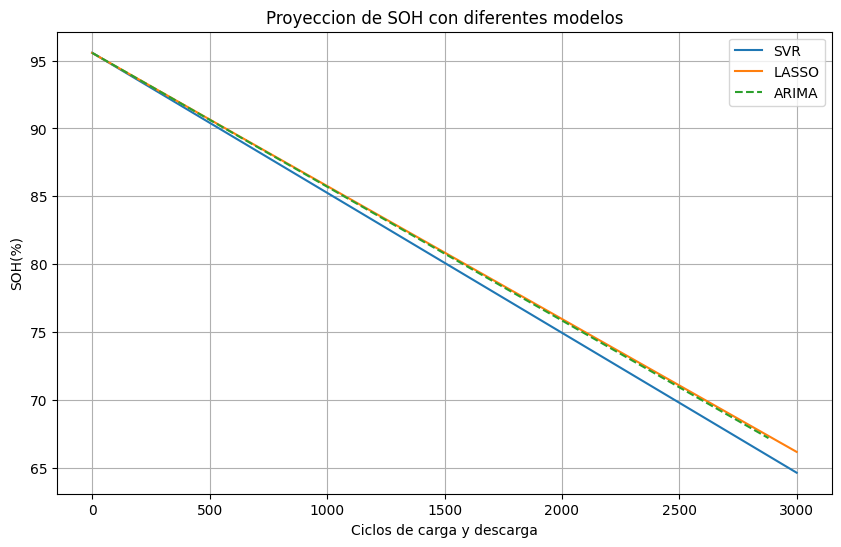

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Crear un gráfico
plt.figure(figsize=(10, 6))

# Graficar los vectores
plt.plot(SOH_FUT_SVR, label='SVR',)
plt.plot(SOH_FUT, label='LASSO', )
plt.plot(X_L, y_L, label='ARIMA', linestyle='--')

# Añadir título y etiquetas
plt.title('Proyeccion de SOH con diferentes modelos')
plt.xlabel('Ciclos de carga y descarga')
plt.ylabel('SOH(%)')

# Añadir una leyenda
plt.legend()

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()


In [ ]:
import pandas as pd

# Assuming SOH_FUT_SVR, SOH_FUT, y_L, Fttf_SVR, Fttf_LASSO, Fttf_RL are defined

# Get the minimum length of all lists
min_len = min(len(SOH_FUT_SVR), len(SOH_FUT), len(y_L), len(Fttf_SVR), len(Fttf_LASSO), len(Fttf_RL))

# Truncate lists to the minimum length
SOH_FUT_SVR = SOH_FUT_SVR[:min_len]
SOH_FUT = SOH_FUT[:min_len]
y_L = y_L[:min_len]
Fttf_SVR = Fttf_SVR[:min_len]
Fttf_LASSO = Fttf_LASSO[:min_len]
Fttf_RL = Fttf_RL[:min_len]

# Create the DataFrame
DFF = pd.DataFrame({'SOH_SVR': SOH_FUT_SVR,
                   'SOH_LASSO': SOH_FUT,
                   'SOH_ARIMA': y_L,
                   'Fttf_SVR': Fttf_SVR,
                   'Fttf_LASSO': Fttf_LASSO,
                   'Fttf_ARIMA': Fttf_RL})
DFF.to_csv('DFF.csv', index=False)

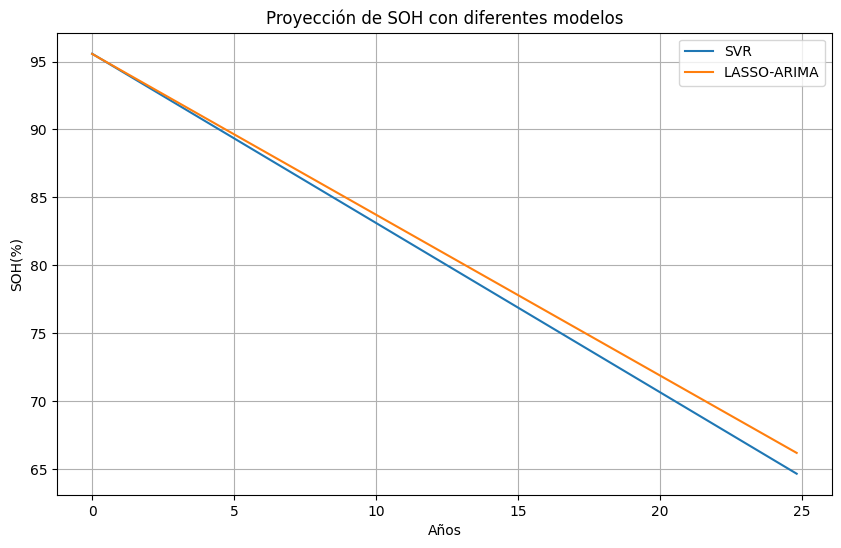

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo, asumiendo que estos vectores contienen tus predicciones
# Asegúrate de que estos vectores estén definidos correctamente en tu código
# SOH_FUT_SVR = ... (predicciones SVR)
# SOH_FUT = ... (predicciones Lasso)
# X_L, y_L = ... (predicciones ARIMA)

# Definir la constante de conversión de ciclos a años
ciclos_por_ano = 145 * 10 / 12  # 145 ciclos corresponden a 10 meses, lo que es igual a 10/12 años

# Convertir ciclos a años
ciclos = np.arange(len(SOH_FUT_SVR))  # Suponiendo que tienes los datos en una secuencia de ciclos

# Convertir los ciclos a años (multiplicamos por la relación que calculamos)
años = ciclos / ciclos_por_ano

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Graficar los vectores, ahora con años en el eje X
plt.plot(años, SOH_FUT_SVR, label='SVR')
plt.plot(años, SOH_FUT, label='LASSO-ARIMA')
#plt.plot(X_L, y_L, label='ARIMA', linestyle='--')

# Añadir título y etiquetas
plt.title('Proyección de SOH con diferentes modelos')
plt.xlabel('Años')
plt.ylabel('SOH(%)')

# Añadir una leyenda
plt.legend()

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

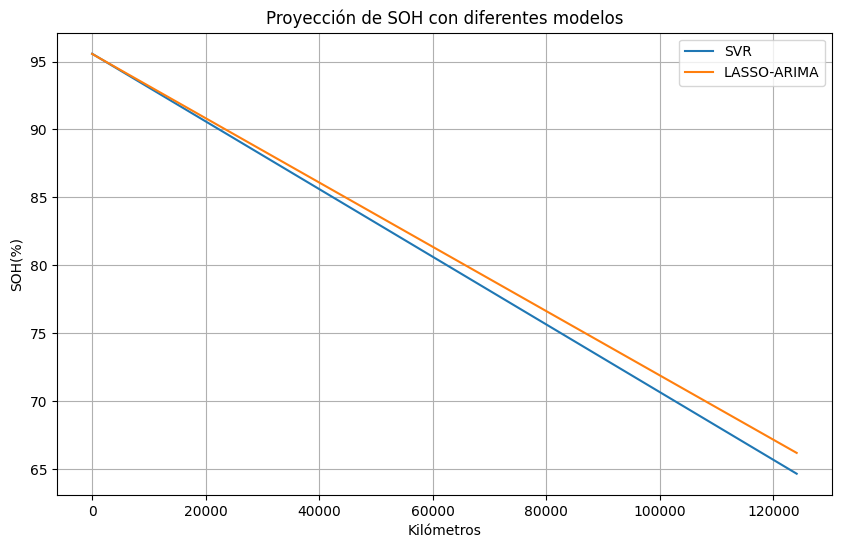

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo, asumiendo que estos vectores contienen tus predicciones
# Asegúrate de que estos vectores estén definidos correctamente en tu código
# SOH_FUT_SVR = ... (predicciones SVR)
# SOH_FUT = ... (predicciones Lasso)
# X_L, y_L = ... (predicciones ARIMA)

# Definir la constante de conversión de ciclos a kilómetros
kilometros_por_ciclo = 6000 / 145  # 145 ciclos corresponden a 6000 km

# Convertir ciclos a kilómetros
ciclos = np.arange(len(SOH_FUT_SVR))  # Suponiendo que tienes los datos en una secuencia de ciclos

# Convertir los ciclos a kilómetros (multiplicamos por la relación que calculamos)
kilometros = ciclos * kilometros_por_ciclo

# Crear un gráfico
plt.figure(figsize=(10, 6))

# Graficar los vectores, ahora con kilómetros en el eje X
plt.plot(kilometros, SOH_FUT_SVR, label='SVR')
plt.plot(kilometros, SOH_FUT, label='LASSO-ARIMA')
#plt.plot(kilometros, y_L, label='ARIMA', linestyle='--')

# Añadir título y etiquetas
plt.title('Proyección de SOH con diferentes modelos')
plt.xlabel('Kilómetros')
plt.ylabel('SOH(%)')

# Añadir una leyenda
plt.legend()

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()

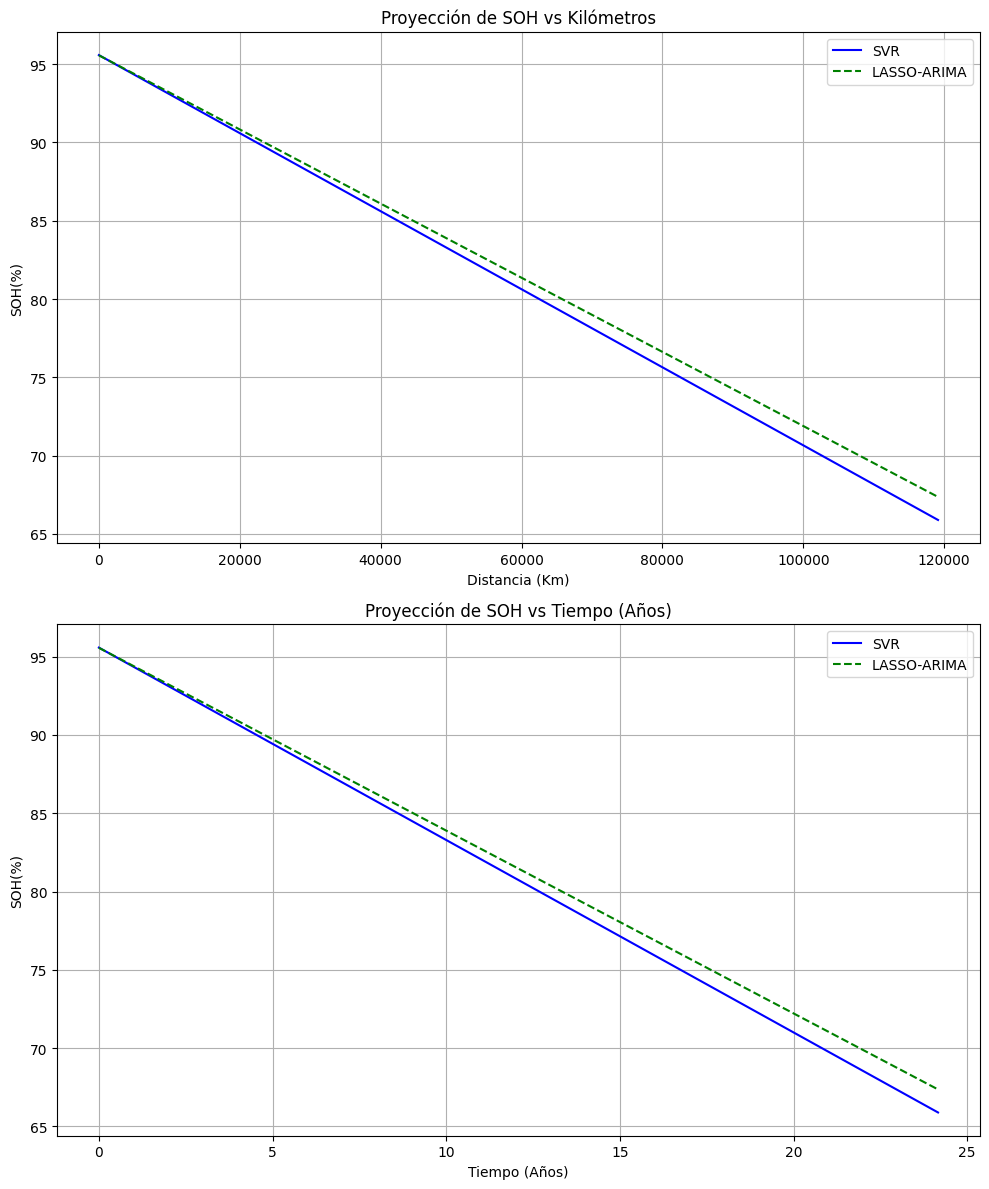

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir la constante de conversión de ciclos a kilómetros y años
kilometros_por_ciclo = 6000 / 145  # 145 ciclos corresponden a 6000 km
ciclos_por_ano = 143 * (10 / 12)  # 145 ciclos corresponden a 10 meses, lo que es igual a 10/12 años

# Convertir ciclos a kilómetros y años
ciclos = np.arange(len(SOH_FUT_SVR))  # Suponiendo que tienes los datos en una secuencia de ciclos
kilometros = ciclos * kilometros_por_ciclo  # Convertir ciclos a kilómetros
años = ciclos / ciclos_por_ano  # Convertir ciclos a años

# Crear un bloque de 2 subgráficas (2 filas, 1 columna)
fig, axes = plt.subplots(2, 1, figsize=(10, 12))  # 2 filas, 1 columna

# Figura 1: Graficar Kilómetros
axes[0].plot(kilometros, SOH_FUT_SVR, label='SVR', linestyle='-', color='b')
axes[0].plot(kilometros, SOH_FUT, label='LASSO-ARIMA', linestyle='--', color='g')
#axes[0].plot(kilometros, y_L, label='ARIMA', linestyle='-.', color='r')

# Configuración de la figura 1 (Kilómetros)
axes[0].set_title('Proyección de SOH vs Kilómetros')
axes[0].set_xlabel('Distancia (Km)')
axes[0].set_ylabel('SOH(%)')
axes[0].grid(True)
axes[0].legend()

# Figura 2: Graficar Años
axes[1].plot(años, SOH_FUT_SVR, label='SVR', linestyle='-', color='b')
axes[1].plot(años, SOH_FUT, label='LASSO-ARIMA', linestyle='--', color='g')
#axes[1].plot(años, y_L, label='ARIMA', linestyle='-.', color='r')

# Configuración de la figura 2 (Años)
axes[1].set_title('Proyección de SOH vs Tiempo (Años)')
axes[1].set_xlabel('Tiempo (Años)')
axes[1].set_ylabel('SOH(%)')
axes[1].grid(True)
axes[1].legend()

# Ajustar el espacio entre las subgráficas
plt.tight_layout()

# Mostrar las gráficas
plt.show()

#Fttf

In [ ]:
lasso.predict([[2099]])

array([75.00274733])

In [ ]:
svr.predict([[1995]])

array([75.00659795])

In [ ]:
funcion_prediccion_salva_tesis(2087)

75.0053876451693

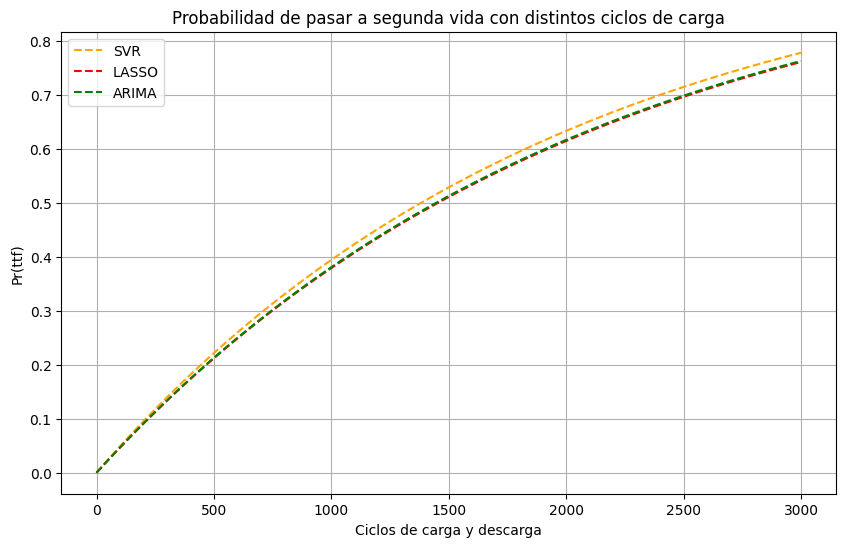

In [ ]:
import numpy as np
import math



MTTF_LASSO=2099
MTTF_SVR=1995
MTTF_RL=2087
MTTR=100000
Lamda_LASSO=1/MTTF_LASSO #Fallas/Ciclo de carga
Lamda_SVR=1/MTTF_SVR
Lamda_RL=1/MTTF_RL
Miu=0

Fttf_LASSO=[]
Fttf_SVR=[]
Fttf_RL=[]
for i in range(3000):
  Fttf_LASSO.append(1-math.exp(-Lamda_LASSO*i))
  Fttf_SVR.append(1-math.exp(-Lamda_SVR*i))
  Fttf_RL.append(1-math.exp(-Lamda_RL*i))



import matplotlib.pyplot as plt
import numpy as np


# Crear un gráfico
plt.figure(figsize=(10, 6))

# Graficar los vectores
plt.plot(Fttf_SVR, label='SVR', linestyle='--', color='orange')
plt.plot(Fttf_LASSO, label='LASSO',linestyle='--', color='red')
plt.plot(Fttf_RL, label='ARIMA', linestyle='--', color='green')

# Añadir título y etiquetas
plt.title('Probabilidad de pasar a segunda vida con distintos ciclos de carga')
plt.xlabel('Ciclos de carga y descarga')
plt.ylabel('Pr(ttf)')

# Añadir una leyenda
plt.legend()

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()


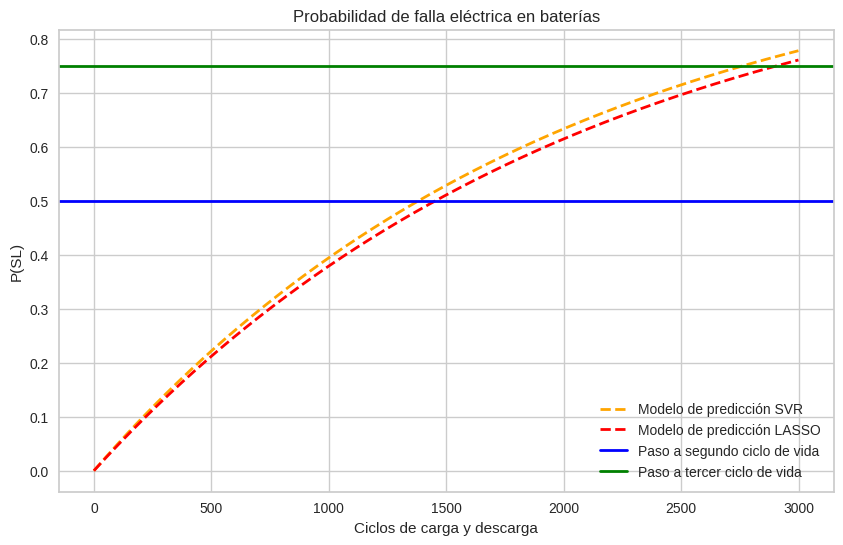

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Definición de los tiempos medios hasta la falla (MTTF)
MTTF_LASSO = 2099
MTTF_SVR = 1995
MTTF_RL = 2087

# Cálculo de las tasas de falla (λ) para cada modelo
Lamda_LASSO = 1 / MTTF_LASSO
Lamda_SVR = 1 / MTTF_SVR
Lamda_RL = 1 / MTTF_RL

# Listas para almacenar la probabilidad de falla acumulada (Fttf) en función de los ciclos
Fttf_LASSO = []
Fttf_SVR = []
Fttf_RL = []

# Cálculo de Fttf para cada ciclo de carga hasta 3000 ciclos
for i in range(3000):
    Fttf_LASSO.append(1 - math.exp(-Lamda_LASSO * i))
    Fttf_SVR.append(1 - math.exp(-Lamda_SVR * i))
    Fttf_RL.append(1 - math.exp(-Lamda_RL * i))

# Configuración y graficación de los datos
plt.figure(figsize=(10, 6))
plt.plot(Fttf_SVR, label='Modelo de predicción SVR', linestyle='--', color='orange', linewidth=2)
plt.plot(Fttf_LASSO, label='Modelo de predicción LASSO', linestyle='--', color='red', linewidth=2)
#plt.plot(Fttf_RL, label='RL', linestyle='--', color='green', linewidth=2)

# Añadir líneas horizontales en el 50% y 75%
plt.axhline(y=0.5, color='blue', linestyle='-', linewidth=2, label='Paso a segundo ciclo de vida')
plt.axhline(y=0.75, color='green', linestyle='-', linewidth=2, label='Paso a tercer ciclo de vida')

# Etiquetas y título
plt.title('Probabilidad de falla eléctrica en baterías')
plt.xlabel('Ciclos de carga y descarga')
plt.ylabel('P(SL)')

# Colocar leyenda en la parte inferior derecha
plt.legend(loc='lower right')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.show()




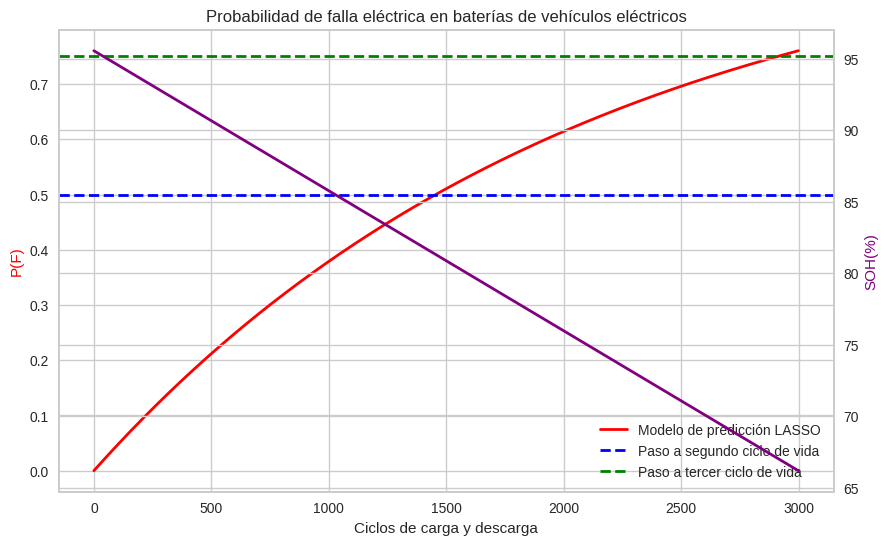

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Definición de los tiempos medios hasta la falla (MTTF) para cada modelo
MTTF_LASSO = 2099
MTTF_SVR = 1995
MTTF_RL = 2087  # Si decides usar RL, descomenta esta línea

# Cálculo de las tasas de falla (λ) para cada modelo
Lamda_LASSO = 1 / MTTF_LASSO
Lamda_SVR = 1 / MTTF_SVR
Lamda_RL = 1 / MTTF_RL  # Si decides usar RL, descomenta esta línea

# Listas para almacenar la probabilidad acumulada de falla (Fttf) en función de los ciclos de carga
Fttf_LASSO = []
Fttf_SVR = []
Fttf_RL = []  # Si decides usar RL, descomenta esta línea

# Cálculo de la probabilidad de falla acumulada (Fttf) para cada ciclo hasta 3000
for i in range(3000):
    Fttf_LASSO.append(1 - math.exp(-Lamda_LASSO * i))
    Fttf_SVR.append(1 - math.exp(-Lamda_SVR * i))
    Fttf_RL.append(1 - math.exp(-Lamda_RL * i))  # Si decides usar RL, descomenta esta línea

# Configuración y graficación de los datos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Graficar los modelos en el eje Y izquierdo
#ax1.plot(Fttf_SVR, label='Modelo de predicción SVR', linestyle='--', color='orange', linewidth=2)
ax1.plot(Fttf_LASSO, label='Modelo de predicción LASSO', linestyle='-', color='red', linewidth=2)
# ax1.plot(Fttf_RL, label='Modelo de predicción RL', linestyle='--', color='green', linewidth=2)  # Si decides usar RL

# Añadir líneas horizontales en el 50% y 75% para representar los puntos de transición a nuevas vidas útiles
#ax1.axhline(y=0.5, color='blue', linestyle='--', linewidth=2, label='Paso a segundo ciclo de vida')
#ax1.axhline(y=0.75, color='green', linestyle='--', linewidth=2, label='Paso a tercer ciclo de vida')

# Etiquetas y título para el primer eje Y (izquierda)
ax1.set_title('Probabilidad de falla eléctrica en baterías de vehículos eléctricos')
ax1.set_xlabel('Ciclos de carga y descarga')
ax1.set_ylabel('P(F)', color='red')
# Colocar la leyenda en la parte inferior derecha
ax1.legend(loc='lower right')

# Crear un segundo eje Y en el lado derecho
ax2 = ax1.twinx()



# Ajustar el rango del segundo eje Y según lo que necesites (por ejemplo, el mismo rango de 0 a 1)
ax2.set_ylabel('SOH(%)', color='purple')  # Cambia esto según lo que necesites

ax2.plot(SOH_FUT, label='SOH ', linestyle='-', color='purple', linewidth=2)
#ax2.set_ylim(0, 1)  # Ajusta el rango si es necesario

# Mostrar la cuadrícula
ax1.grid(True)

# Mostrar el gráfico
plt.show()


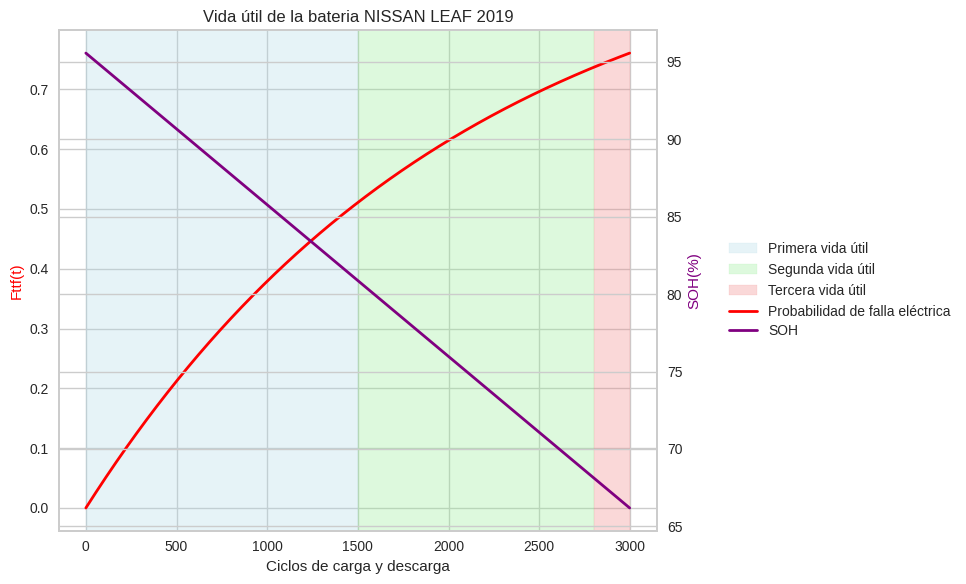

In [ ]:
  import numpy as np
import math
import matplotlib.pyplot as plt

# Definición de los tiempos medios hasta la falla (MTTF) para cada modelo
MTTF_LASSO = 2099
MTTF_SVR = 1995
MTTF_RL = 2087  # Si decides usar RL, descomenta esta línea

# Cálculo de las tasas de falla (λ) para cada modelo
Lamda_LASSO = 1 / MTTF_LASSO
Lamda_SVR = 1 / MTTF_SVR
Lamda_RL = 1 / MTTF_RL  # Si decides usar RL, descomenta esta línea

# Listas para almacenar la probabilidad acumulada de falla (Fttf) en función de los ciclos de carga
Fttf_LASSO = []
Fttf_SVR = []
Fttf_RL = []  # Si decides usar RL, descomenta esta línea

# Cálculo de la probabilidad de falla acumulada (Fttf) para cada ciclo hasta 3000
for i in range(3000):
    Fttf_LASSO.append(1 - math.exp(-Lamda_LASSO * i))
    Fttf_SVR.append(1 - math.exp(-Lamda_SVR * i))
    Fttf_RL.append(1 - math.exp(-Lamda_RL * i))  # Si decides usar RL, descomenta esta línea

# Configuración y graficación de los datos
fig, ax1 = plt.subplots(figsize=(10, 6))

# Colorear el fondo en secciones específicas
ax1.axvspan(0, 1500, color='lightblue', alpha=0.3, label='Primera vida útil')
ax1.axvspan(1500, 2800, color='lightgreen', alpha=0.3, label='Segunda vida útil')
ax1.axvspan(2800, 3000, color='lightcoral', alpha=0.3, label='Tercera vida útil')

# Graficar los modelos en el eje Y izquierdo
# ax1.plot(Fttf_SVR, label='Modelo de predicción SVR', linestyle='--', color='orange', linewidth=2)
ax1.plot(Fttf_LASSO, label='Probabilidad de falla eléctrica', linestyle='-', color='red', linewidth=2)
# ax1.plot(Fttf_RL, label='Modelo de predicción RL', linestyle='--', color='green', linewidth=2)  # Si decides usar RL

# Añadir líneas horizontales en el 50% y 75% para representar los puntos de transición a nuevas vidas útiles
# ax1.axhline(y=0.5, color='blue', linestyle='--', linewidth=2, label='Paso a segundo ciclo de vida')
# ax1.axhline(y=0.75, color='green', linestyle='--', linewidth=2, label='Paso a tercer ciclo de vida')

# Etiquetas y título para el primer eje Y (izquierda)
ax1.set_title('Vida útil de la bateria NISSAN LEAF 2019')
ax1.set_xlabel('Ciclos de carga y descarga')
ax1.set_ylabel('Fttf(t)', color='red')

# Colocar la leyenda fuera del gráfico
ax1.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

# Crear un segundo eje Y en el lado derecho
ax2 = ax1.twinx()

# Ajustar el rango del segundo eje Y según lo que necesites (por ejemplo, el mismo rango de 0 a 1)
ax2.set_ylabel('SOH(%)', color='purple')  # Cambia esto según lo que necesites

# Ejemplo de datos para SOH_FUT (esto debe ser definido previamente en el código)
#SOH_FUT = np.linspace(100, 0, 3000)  # Simulación de la reducción del SOH

ax2.plot(SOH_FUT, label='SOH', linestyle='-', color='purple', linewidth=2)

# Añadir la leyenda fuera del gráfico para SOH
ax2.legend(loc='center left', bbox_to_anchor=(1.1, 0.4))

# Mostrar la cuadrícula
ax1.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()




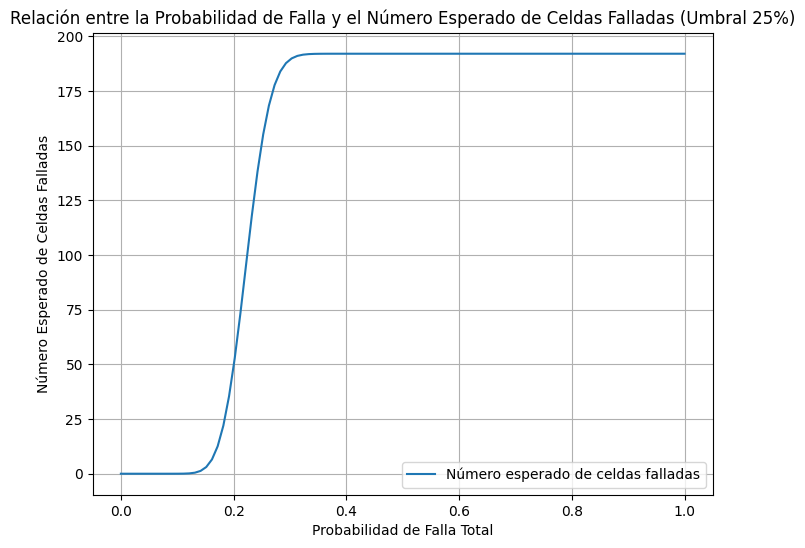

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parámetros del problema
total_celdas = 96  # Número de celdas por pack
celdas_totales = total_celdas * 2  # Dos packs en serie
umbral_fallo = 0.25  # Umbral de celdas falladas por pack (25%)

# Función para calcular la probabilidad de fallo de la batería
def calcular_probabilidad_fallo(p):
    # Probabilidad de que al menos el 25% de las celdas de un pack fallen
    n = total_celdas
    k_min = int(umbral_fallo * n)  # Al menos el 25% de las celdas deben fallar
    prob_fallo_pack = 1 - binom.cdf(k_min - 1, n, p)
    # Probabilidad de fallo de la batería (al menos uno de los packs falla)
    return 1 - (1 - prob_fallo_pack)**2

# Crear un rango de probabilidades de fallo por celda (0 a 1)
probabilidades_fallo = np.linspace(0, 1, 100)

# Calcular el número esperado de celdas falladas para cada probabilidad de falla
numero_esperado_celdas_falladas = [celdas_totales * calcular_probabilidad_fallo(p) for p in probabilidades_fallo]

# Graficar la relación
plt.figure(figsize=(8, 6))
plt.plot(probabilidades_fallo, numero_esperado_celdas_falladas, label="Número esperado de celdas falladas")
plt.xlabel("Probabilidad de Falla Total")
plt.ylabel("Número Esperado de Celdas Falladas")
plt.title("Relación entre la Probabilidad de Falla y el Número Esperado de Celdas Falladas (Umbral 25%)")
plt.grid(True)
plt.legend()
plt.show()

